In [1]:
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('test files/detected_results.csv')

In [3]:
def tupleCoords(x,y):
    return (int(x),int(y))

df['tuple_coords'] = df[['centroid_x','centroid_y']].apply(lambda x:tupleCoords(*x),axis=1)

In [4]:
def centroidMinMax(coord):
    '''return slice values which will correspond to a single cell in numpy image matrix
       can change size of slice (cell size) according to number of cells and image size'''
    
    #set min/max according to image size
    #necessary for cell centroid cooridnates that are on edge of image
    min_coord = 0
    max_coord = 2844
    
    #set minimum dimension for cell size in image
    #minimum where centroid coordinate is min or max i.e. on edge of image
    #else cell dimension will be twice minimum dimension
    minium_dimension = 5
    
    #check centroid coordinate is not on edge of image
    #if so, return min/max coordinate
    #else return slice as centroid coordinate +- minium_dimension
    if coord - minium_dimension < min_coord:
        coord_low_lim = min_coord
    else:
        coord_low_lim = coord - minium_dimension
        
    if coord + minium_dimension > max_coord:
        coord_upper_lim = max_coord
    else:
        coord_upper_lim = coord + minium_dimension
    
    return (coord_low_lim,coord_upper_lim)

In [5]:
def emptyMatrixViz(coord_list):
    '''input list of tuple coordinates 
       return viz of empty matrix and coordinate cells as RGB square proporttional to cell channel values'''
    
    image = np.zeros((2845,2845,3), 'uint16')

    #iterate through coordinates in dataframe, setting values to numpy matrix
    for i in coord_list.index:
        x_limits,y_limits = centroidMinMax(coord_list[i][0]),centroidMinMax(coord_list[i][1])
        image[:,:,0][x_limits[0]:x_limits[1],y_limits[0]:y_limits[1]] = df.iloc[i].get('rgb_red')
        image[:,:,1][x_limits[0]:x_limits[1],y_limits[0]:y_limits[1]] = df.iloc[i].get('rgb_green')
        image[:,:,2][x_limits[0]:x_limits[1],y_limits[0]:y_limits[1]] = df.iloc[i].get('rgb_blue')
    
    plt.figure(figsize=(12,12))
    plt.imshow(image)

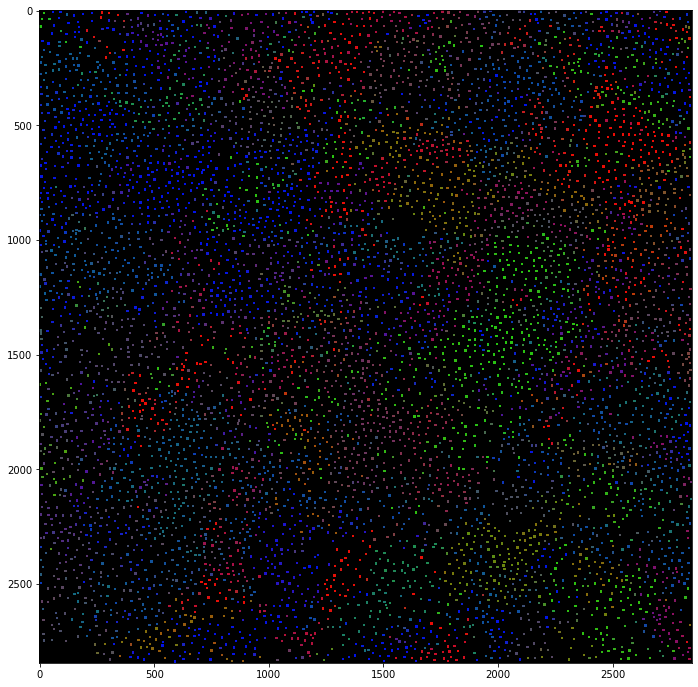

In [6]:
#viz all cells as RGB values
emptyMatrixViz(df['tuple_coords'])

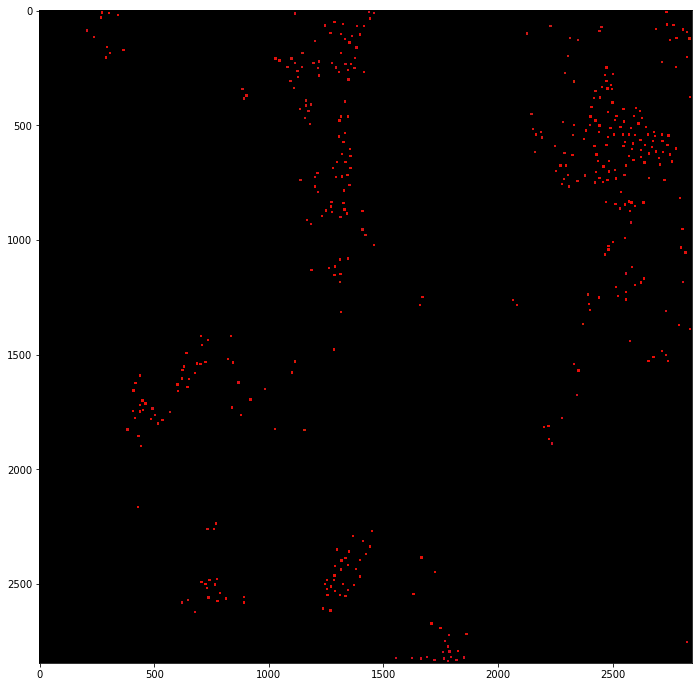

In [7]:
#fuse boolean expression to filter cells 
df2 = df[df['ratio_red'] >= 0.8]

emptyMatrixViz(df2['tuple_coords'])